# Polynomial Regression using sklearn's Calfornia Housing Data set

## Install Scikit-learn Library

In [4]:
# %pip install scikit-learn

In [6]:
import pandas as pd

## Load Data
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [9]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()


In [10]:
#Features data are provided in housing_data.data
housing_data.data, housing_data.feature_names

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])

In [13]:
#Target data is provided in housing_data.target
housing_data.target, housing_data.target_names

(array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 ['MedHouseVal'])

In [15]:
#Build X (Features) and y (Target)
X = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)

y = pd.DataFrame(data=housing_data.target, columns=housing_data.target_names)

In [17]:
df = pd.concat([X, y], axis =1)

#MedHouseVal column is is the unit of 100,000. e.g., 4.5 represents $450,000

In [19]:
#Merge X and y to build df
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Perform Data Analysis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [24]:
df.describe()
# df.describe().map(lambda x: format(x, ".2f"))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


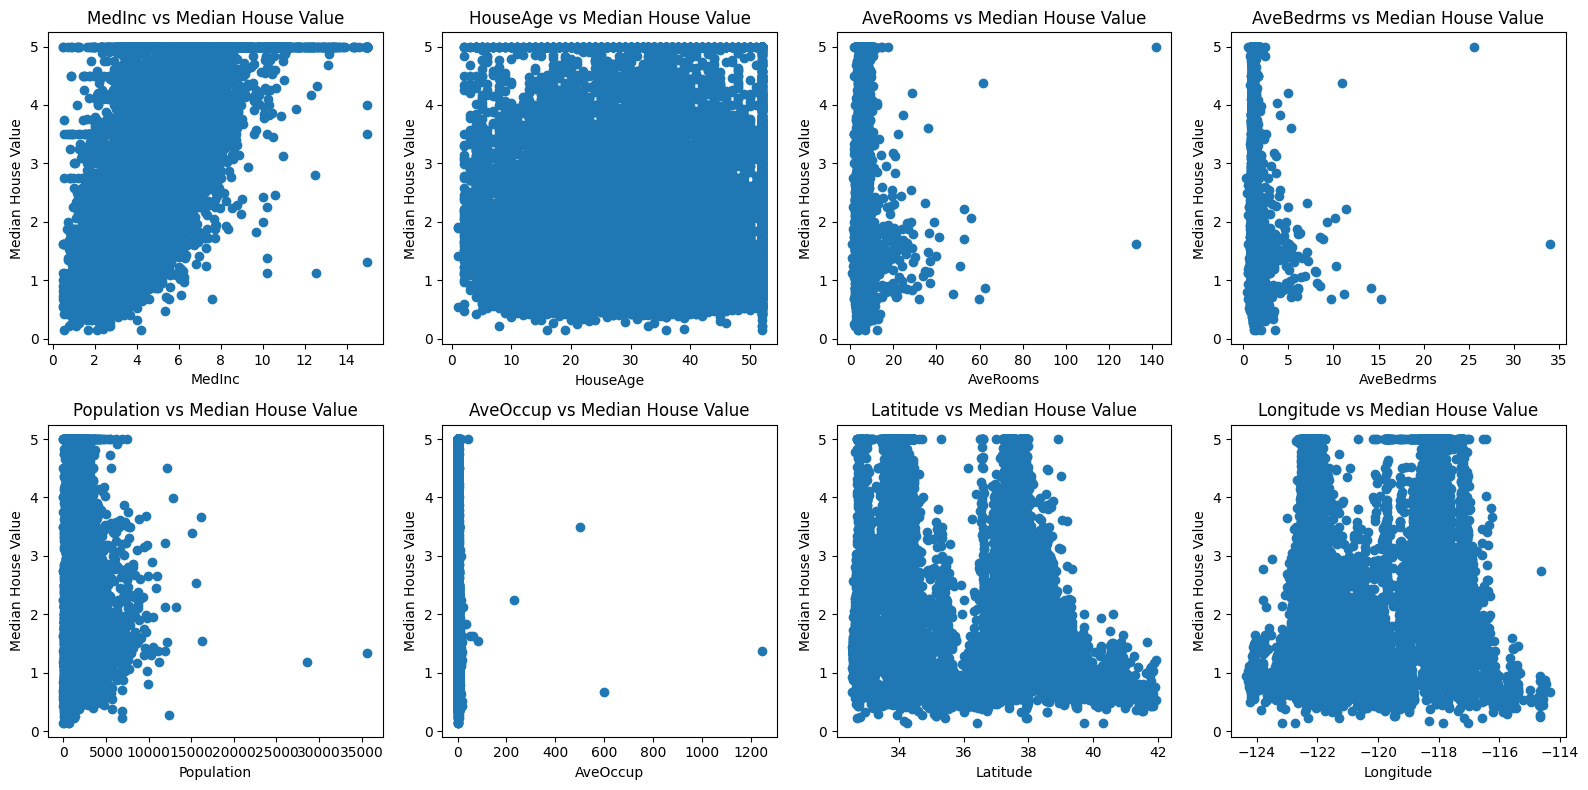

In [26]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()  # Flatten 2D grid into 1D array for easy indexing

for i, column in enumerate(df.columns[:-1]):  # Exclude 'target'
    axs[i].scatter(df[column], df['MedHouseVal'])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Median House Value')
    axs[i].set_title(f'{column} vs Median House Value')

plt.tight_layout()
plt.show()

In [28]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


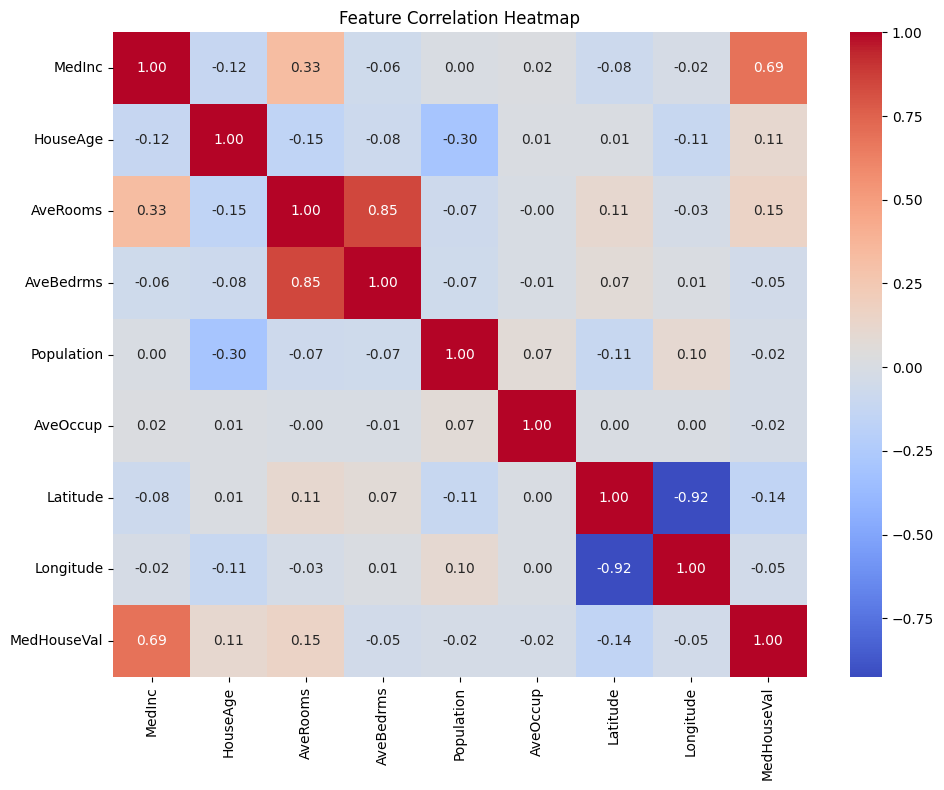

In [30]:
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()

plt.show()

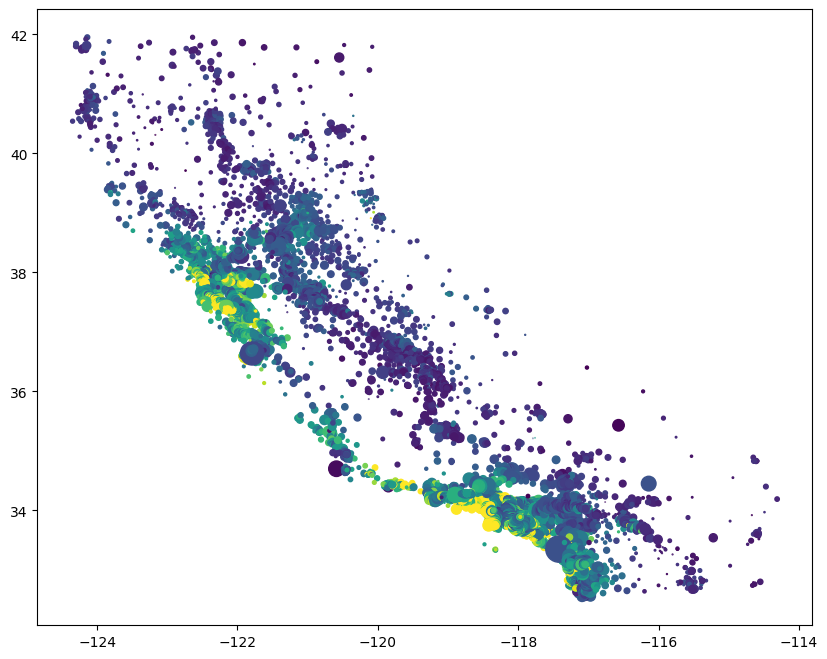

In [32]:
#Scatter plot of price by Longitude and Latitude
plt.figure(figsize=(10, 8))
plt.scatter(
    x=df["Longitude"],
    y=df["Latitude"],
    c=df["MedHouseVal"],
    s=df["Population"] / 100,  # Scale population for marker size
)
plt.show()

## Create a model

In [35]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
from sklearn.model_selection import train_test_split

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.fit_transform(X_test_unscaled)

In [114]:
X_train_unscaled, X_train

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 13318  2.8370      38.0  4.570896   1.014925      1823.0  3.401119     34.07   
 12423  2.9286      22.0  2.814286   0.771429       331.0  4.728571     33.69   
 18855  2.0375      26.0  7.120000   1.600000        55.0  2.200000     41.21   
 448    2.5430      46.0  4.477037   1.031111      1293.0  1.915556     37.87   
 19087  3.0750      25.0  4.325967   0.972376       784.0  2.165746     38.35   
 ...       ...       ...       ...        ...         ...       ...       ...   
 5633   1.8393      18.0  2.090426   1.005319       429.0  2.281915     33.75   
 15363  6.2475      12.0  7.421320   1.098985      1193.0  3.027919     33.31   
 17871  2.9817      21.0  4.876988   1.045599      2756.0  2.922587     37.44   
 19907  2.7500      32.0  6.090301   1.153846       812.0  2.715719     36.32   
 20196  3.3452      23.0  5.573359   1.042471      1508.0  2.911197     34.26   
 
        Longitude  
 13318

In [116]:
X_test_unscaled, X_test

(        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 19678   2.4556      16.0  4.516630   1.028825      1267.0  2.809313     39.16   
 4046   11.2979      24.0  8.321970   1.013258      1443.0  2.732955     34.13   
 13931   4.2386      18.0  9.119159   1.670561      1388.0  3.242991     34.28   
 15625   3.6065      52.0  4.736964   1.096176      1906.0  2.208575     37.80   
 5495    5.8083      10.0  5.694030   1.264925       705.0  2.630597     34.00   
 ...        ...       ...       ...        ...         ...       ...       ...   
 18081  10.7958      25.0  7.950089   0.985740      1608.0  2.866310     37.27   
 14479   7.4351      18.0  8.448370   1.361413       949.0  2.578804     32.83   
 5361   11.1768      52.0  6.461774   1.015291       800.0  2.446483     34.04   
 14717   8.7604      17.0  7.962145   1.047319       771.0  2.432177     32.79   
 16451   4.0625      48.0  5.375000   0.946023       804.0  2.284091     38.13   
 
        Longit

In [118]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
print (X_train_poly.shape)

# Get feature names
feature_names = poly.get_feature_names_out(input_features=X.columns)
X_poly_df = pd.DataFrame(data=X_train_poly, columns=feature_names)
print(X_poly_df.head())

(14448, 45)
     1    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0  1.0 -0.544132  0.737358 -0.356042  -0.167559    0.348672  0.028067   
1  1.0 -0.496100 -0.531408 -1.091771  -0.678296   -0.965132  0.145077   
2  1.0 -0.963355 -0.214216  0.711612   1.059641   -1.208168 -0.077808   
3  1.0 -0.698293  1.371741 -0.395353  -0.133609   -0.118028 -0.102881   
4  1.0 -0.419335 -0.293514 -0.458626  -0.256807   -0.566236 -0.080827   

   Latitude  Longitude  MedInc^2  ...  Population^2  Population AveOccup  \
0 -0.729922   0.962037  0.296079  ...      0.121572             0.009786   
1 -0.908271   1.706097  0.246116  ...      0.931479            -0.140019   
2  2.621161  -1.384995  0.928053  ...      1.459669             0.094005   
3  1.053568  -1.355033  0.487613  ...      0.013931             0.012143   
4  1.278850  -1.464894  0.175841  ...      0.320623             0.045767   

   Population Latitude  Population Longitude  AveOccup^2  AveOccup Latitude  \
0            

In [120]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_.ravel()
})

# Sort by actual value (descending)
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

# Format to 4 decimal places
coef_df_sorted['Coefficient'] = coef_df_sorted['Coefficient'].map(lambda x: format(x, '.4f'))

# Print nicely
print(coef_df_sorted.to_string(index=False))

             Feature Coefficient
              MedInc      0.9243
           AveBedrms      0.5684
  AveOccup Longitude      0.5664
   AveRooms Latitude      0.5112
   AveRooms AveOccup      0.4670
  AveRooms Longitude      0.4444
   AveOccup Latitude      0.4191
  Latitude Longitude      0.4121
 Population AveOccup      0.3065
          Latitude^2      0.2464
AveBedrms Population      0.2416
     MedInc AveRooms      0.2238
         Longitude^2      0.1409
            HouseAge      0.1397
   MedInc Population      0.1091
  HouseAge AveBedrms      0.0624
          Population      0.0529
     MedInc HouseAge      0.0442
 HouseAge Population      0.0375
 Population Latitude      0.0312
          HouseAge^2      0.0306
         AveBedrms^2      0.0237
          AveRooms^2      0.0184
          AveOccup^2      0.0138
Population Longitude      0.0074
  AveBedrms AveOccup      0.0032
        Population^2      0.0018
                   1     -0.0000
   HouseAge AveRooms     -0.0330
  AveRooms

In [122]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [124]:
model.coef_

array([[-9.90094293e-16,  9.24311454e-01,  1.39739540e-01,
        -3.73811631e-01,  5.68430572e-01,  5.29080183e-02,
        -2.17175750e+00, -1.28762273e+00, -1.17807562e+00,
        -1.21897570e-01,  4.42070838e-02,  2.23802285e-01,
        -1.85380948e-01,  1.09148275e-01, -8.58104015e-02,
        -6.78058806e-01, -5.93007958e-01,  3.06355745e-02,
        -3.30319612e-02,  6.24480421e-02,  3.74711316e-02,
        -9.33433992e-02, -2.80804729e-01, -2.65786546e-01,
         1.84479935e-02, -4.49119477e-02, -1.48249534e-01,
         4.66979540e-01,  5.11194619e-01,  4.44390122e-01,
         2.37087703e-02,  2.41619102e-01,  3.18741681e-03,
        -4.69086556e-01, -3.93632301e-01,  1.84010377e-03,
         3.06480914e-01,  3.12358753e-02,  7.43555710e-03,
         1.37760678e-02,  4.19097845e-01,  5.66363629e-01,
         2.46388833e-01,  4.12065939e-01,  1.40881501e-01]])

In [126]:
#Making model.coef_ more readable
formatted_coefs = [format(coef, ".3f") for coef in model.coef_.flatten()]
print(formatted_coefs)

#Linear regression Coefs:
# ['0.427', '0.010', '-0.092', '0.576', '-0.000', '-0.003', '-0.431', '-0.442']

['-0.000', '0.924', '0.140', '-0.374', '0.568', '0.053', '-2.172', '-1.288', '-1.178', '-0.122', '0.044', '0.224', '-0.185', '0.109', '-0.086', '-0.678', '-0.593', '0.031', '-0.033', '0.062', '0.037', '-0.093', '-0.281', '-0.266', '0.018', '-0.045', '-0.148', '0.467', '0.511', '0.444', '0.024', '0.242', '0.003', '-0.469', '-0.394', '0.002', '0.306', '0.031', '0.007', '0.014', '0.419', '0.566', '0.246', '0.412', '0.141']


## Evaluate the model performance on Train Data(Mean Squared Error, Mean Absolute Error, Root Mean Squared Error)

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

y_train_preds = model.predict(X_train_poly)

mae_train = mean_absolute_error(y_train_preds, y_train)
mse_train = mean_squared_error(y_train_preds, y_train)
rmse_train = root_mean_squared_error(y_train_preds, y_train)

format(mae_train, "0.4f"), format(mse_train, "0.4f"), format(rmse_train, "0.4f")

/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


('0.4584', '0.4210', '0.6488')

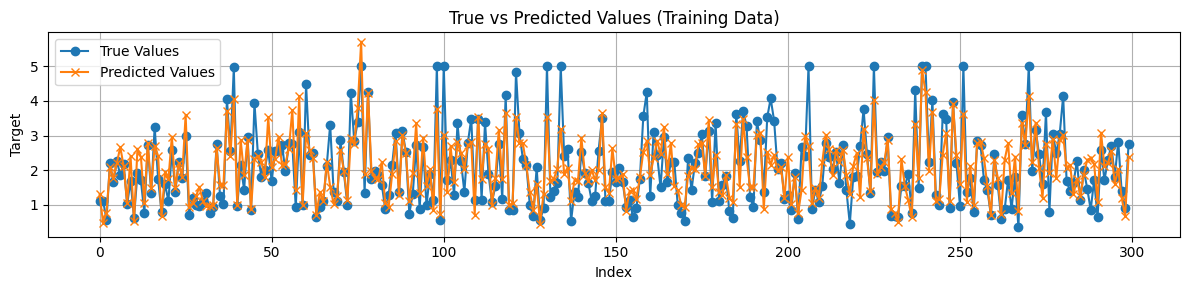

In [130]:
plt.figure(figsize=(12, 3))

# Plot true vs predicted values
plt.plot(y_train.values[:300], label='True Values', marker='o')
plt.plot(y_train_preds[:300], label='Predicted Values', marker='x')

plt.title('True vs Predicted Values (Training Data)')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Evaluate the model performance on Test Data(Mean Squared Error, Mean Absolute Error, Root Mean Squared Error)

In [132]:
X_test_poly = poly.fit_transform(X_test)
print (X_test_poly.shape)

y_test_preds = model.predict(X_test_poly)

mse_test = mean_squared_error(y_test_preds, y_test)
rmse_test = root_mean_squared_error(y_test_preds, y_test)
mae_test = mean_absolute_error(y_test_preds, y_test)

format(mae_test, "0.4f"), format(mse_test, "0.4f"), format(rmse_test, "0.4f")

(6192, 45)


/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


('0.4727', '0.4934', '0.7024')

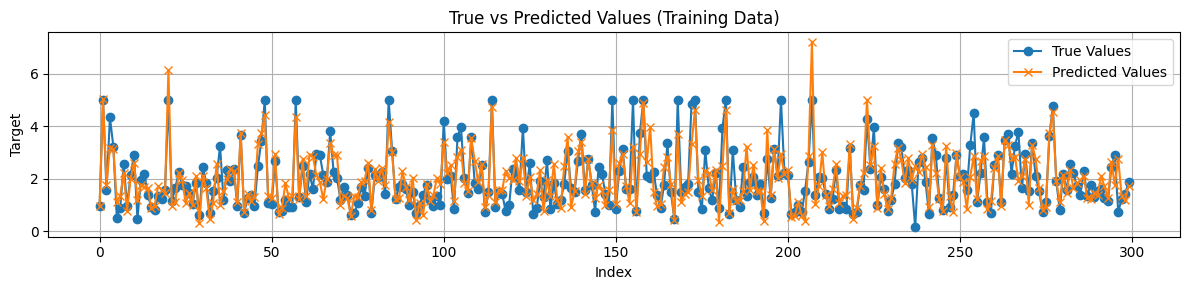

In [134]:
plt.figure(figsize=(12, 3))

# Plot true vs predicted values
plt.plot(y_test.values[:300], label='True Values', marker='o')
plt.plot(y_test_preds[:300], label='Predicted Values', marker='x')

plt.title('True vs Predicted Values (Training Data)')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Compare train and test error rates

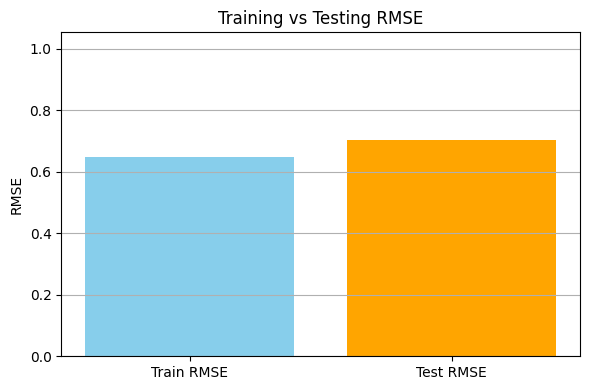

In [137]:
# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Train RMSE', 'Test RMSE'], [rmse_train, rmse_test], color=['skyblue', 'orange'])

plt.ylabel('RMSE')
plt.title('Training vs Testing RMSE')
plt.ylim(0, max(rmse_train, rmse_test) * 1.5)  # Add a little headroom
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [139]:
# As the target is in 100,000s, the Train RMSE of 0.7191 means error value to 0.7191 * 100, 000
rmse_dollar_value = format((rmse_train * 100000), ",.2f")
print( f"The Training RMSE or Deviation from predicted value is ${rmse_dollar_value}")

The Training RMSE or Deviation from predicted value is $64,884.51


In [144]:
# R2 Score
from sklearn.metrics import r2_score
y_pred = model.predict(X_test_poly)
r2_score( y_test, y_test_preds)

/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


0.6238345479239484